In [54]:
import pandas as pd

df = pd.read_csv("설명서/data/naver_cafe_articles_cleaned.csv")
df

,Title
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...
...,...
1187,년윌식 리코 차량 취급설명서 구할곳이 없을까요 쌍용차 고객센터에 전화 불편하네요 회...
1188,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...
1189,아이오닉 취급설명서입니다 현대차에서 다운로드한 것입니다 첨부파일 아이오닉취급설명서 ...
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...


In [55]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.font_manager as fm

In [56]:
# 형태소 분석기 초기화
okt = Okt()

In [58]:
stopwords_df = pd.read_csv('설명서/data/ko-stopwords.csv')
stopwords = list(stopwords_df['stopwords'])
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [85]:
#원하는 태그 추출 & 불용어 제거

def okt_pos_tagging(string):  # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True)  # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords:  # 불용어 목록에 들어있지 않으면
                if len(word) > 1:
                    if word != "사용설명서" and word != "설명":
                        tagged_list.append(word)  # 리스트 목록에 추가해라
    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [86]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.Title):
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)

df['tagged_review'] = tagged_review
df

100%|██████████| 1192/1192 [00:07<00:00, 156.00it/s]


,Title,tagged_review,vector,cluster
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...,"[명절, 아빠, 따르다, 대형, 마트, 서다, 사오다, 띠옹, 조립, 가다, 어딨다...","[-0.006665225, -0.004781584, -0.009595165, 0.0...",4
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...,"[릴오, 사진, 찍다, 보관, 오늘, 보다, 한글, 사용, 공부, 공부, 가보다]","[-0.009545242, 0.0006315706, -0.0050352076, 0....",4
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.026091153, 0.008120012, 0.012973024, 0.015...",0
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.010521283, 0.014089638, 0.0035113962, 0.01...",4
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.028902348, 0.013453042, 0.00092199584, 0.0...",0
...,...,...,...,...
1187,년윌식 리코 차량 취급설명서 구할곳이 없을까요 쌍용차 고객센터에 전화 불편하네요 회...,"[년윌식, 리코, 차량, 취급, 없다, 쌍용차, 고객, 센터, 전화, 불편하다, 회...","[-0.018766923, 0.019332405, -0.00238694, 0.013...",0
1188,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...,"[댓글, 파일, 안되다, 올리다, 전원, 아니다, 녹화, 설정, 나오다, 자세하다,...","[-0.009703005, 0.0012149683, -0.0030440579, 0....",4
1189,아이오닉 취급설명서입니다 현대차에서 다운로드한 것입니다 첨부파일 아이오닉취급설명서 ...,"[아이오, 취급, 현대차, 다운로드, 첨부파일, 아이오, 취급, 파일, 다운로드]","[0.0043004225, 0.0070023667, 0.011825249, 0.01...",4
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...,"[찍다, 천사, 가요, 중간, 이사, 가다, 없다, 오븐, 기능, 사용, 싶다, 사...","[-0.003574046, 0.0071800104, 0.0069843824, 0.0...",1


In [87]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [88]:
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 1192


In [89]:
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)
model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [90]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)
df['vector'] = vector_list
df

100%|██████████| 1192/1192 [00:00<00:00, 532837.08it/s]


,Title,tagged_review,vector,cluster
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...,"[명절, 아빠, 따르다, 대형, 마트, 서다, 사오다, 띠옹, 조립, 가다, 어딨다...","[-0.0058990023, -0.0049322173, -0.009394715, 0...",4
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...,"[릴오, 사진, 찍다, 보관, 오늘, 보다, 한글, 사용, 공부, 공부, 가보다]","[-0.008247137, 0.002820374, -0.0031695392, 0.0...",4
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.01521943, 0.007458067, 0.01635098, -0.0024...",0
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.0073326607, 0.015817216, 0.005940238, 0.00...",4
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.015088453, 0.012704681, 0.0048679486, 0.00...",0
...,...,...,...,...
1187,년윌식 리코 차량 취급설명서 구할곳이 없을까요 쌍용차 고객센터에 전화 불편하네요 회...,"[년윌식, 리코, 차량, 취급, 없다, 쌍용차, 고객, 센터, 전화, 불편하다, 회...","[-0.009544523, 0.025084868, 0.004894682, -0.00...",0
1188,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...,"[댓글, 파일, 안되다, 올리다, 전원, 아니다, 녹화, 설정, 나오다, 자세하다,...","[-0.0052484972, -0.0018523826, -0.0033505852, ...",4
1189,아이오닉 취급설명서입니다 현대차에서 다운로드한 것입니다 첨부파일 아이오닉취급설명서 ...,"[아이오, 취급, 현대차, 다운로드, 첨부파일, 아이오, 취급, 파일, 다운로드]","[0.005390891, 0.0104963705, 0.013096593, 0.010...",4
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...,"[찍다, 천사, 가요, 중간, 이사, 가다, 없다, 오븐, 기능, 사용, 싶다, 사...","[0.004233292, 0.0058052926, 0.009724175, 0.001...",1


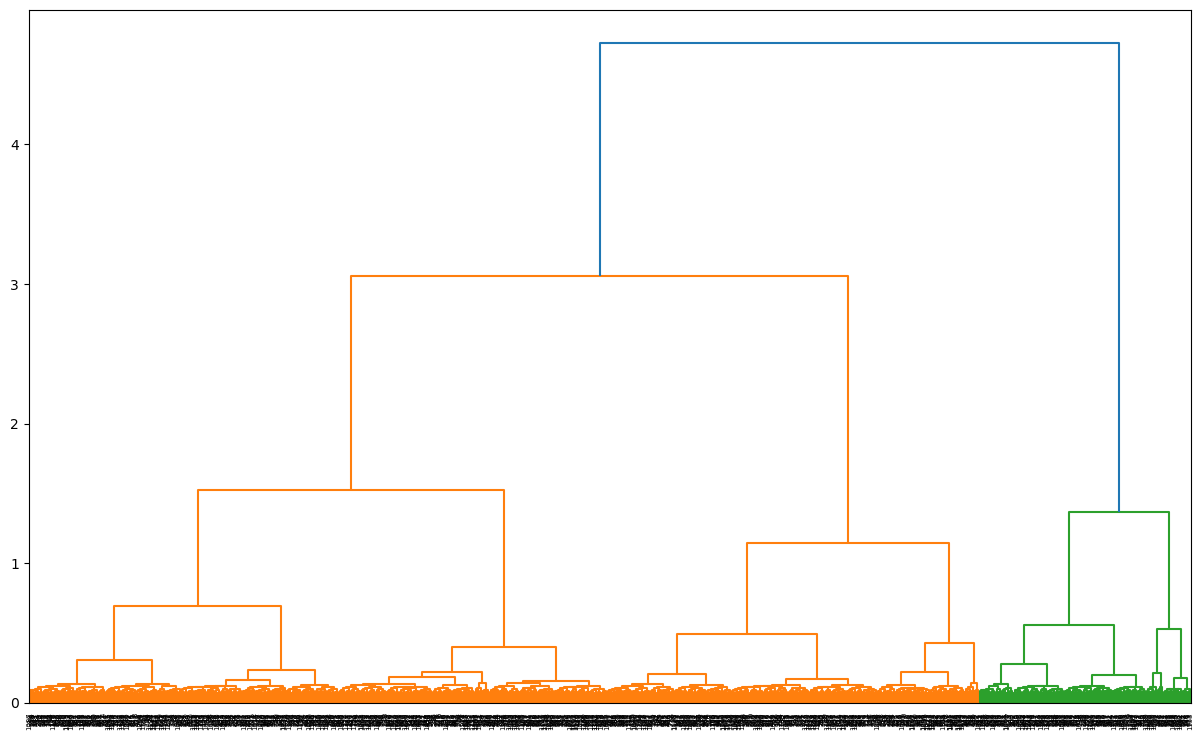

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9))  #인치
dendrogram(linked,
           orientation='top',  # 위에서부터 아래로
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [92]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)
silhouette_avg

0.45380402

100%|██████████| 28/28 [00:01<00:00, 17.28it/s]


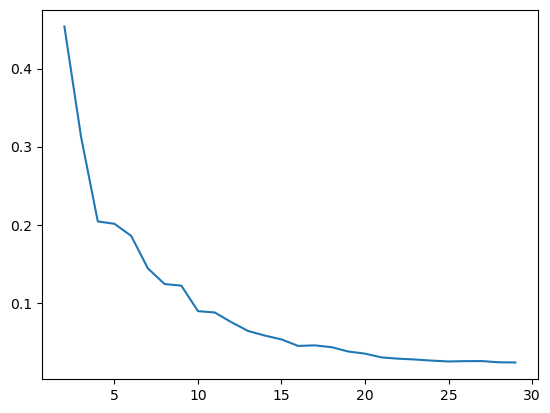

In [93]:
n_clutser = []
clustering_score = []
for i in tqdm(range(2, 30)):  # 군집을 2개부터 29개까지 만들것이다.
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

plt.plot(n_clutser, clustering_score)

In [94]:
result = pd.DataFrame({'n_cluster': n_clutser, 'score': clustering_score})
result

,n_cluster,score
0,2,0.453804
1,3,0.312311
2,4,0.204242
3,5,0.201155
4,6,0.185711
5,7,0.144084
6,8,0.124041
7,9,0.122018
8,10,0.089367
9,11,0.087650


In [95]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

,Title,tagged_review,vector,cluster
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...,"[명절, 아빠, 따르다, 대형, 마트, 서다, 사오다, 띠옹, 조립, 가다, 어딨다...","[-0.0058990023, -0.0049322173, -0.009394715, 0...",2
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...,"[릴오, 사진, 찍다, 보관, 오늘, 보다, 한글, 사용, 공부, 공부, 가보다]","[-0.008247137, 0.002820374, -0.0031695392, 0.0...",2
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.01521943, 0.007458067, 0.01635098, -0.0024...",0
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.0073326607, 0.015817216, 0.005940238, 0.00...",0
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.015088453, 0.012704681, 0.0048679486, 0.00...",0


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_document = []
for i in df['cluster'].unique():

    pos_tagged = df[df['cluster'] == i].tagged_review

    cluster_document = ''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2
가격,0.049586,0.070722,0.039207
가계약,0.000000,0.004277,0.000000
가공품,0.005997,0.000000,0.000000
가구,0.000000,0.000000,0.011064
가까이,0.000000,0.004277,0.000000
...,...,...,...
힘내다,0.000000,0.004277,0.000000
힘드다,0.007084,0.012629,0.019604
힘들다,0.007084,0.007577,0.006535
힘들다카카오,0.005997,0.000000,0.000000


In [97]:
for i in tqdm(tf_idf_df_transposed.columns):
    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word': tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    data_df.to_csv('clusters/Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 3/3 [00:00<00:00, 130.21it/s]


# 클러스터 0

In [98]:
df_cluster0 = df[df["cluster"] == 0]
display(df_cluster0)
display(df_cluster0.shape)

,Title,tagged_review,vector,cluster
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.01521943, 0.007458067, 0.01635098, -0.0024...",0
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.0073326607, 0.015817216, 0.005940238, 0.00...",0
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.015088453, 0.012704681, 0.0048679486, 0.00...",0
6,출고 그냥 던져 두었던 사용 설명서를 소설 읽듯 정독 한번 했습니다 궁굼 했던 사용...,"[출고, 그냥, 던지다, 두다, 사용, 소설, 읽다, 정독, 한번, 궁굼, 사용, ...","[-0.012885421, 0.00178408, 0.0007520409, -0.00...",0
8,안녕하세요 밀키트 판매 하려고 즉판업 영업신고 필요서류에 제조방법 설명서와 식품표시...,"[안녕하다, 키트, 판매, 즉판업, 영업, 신고, 필요, 서류, 제조, 방법, 오다...","[-0.01100888, 0.014917348, 0.013316108, -0.000...",0
...,...,...,...,...
1181,안녕하세요 혹시 사용설명서 있으면 요청가능할가요 계기판은 우측 필러에 있는 모델입니...,"[안녕하다, 요청, 가능하다, 계기, 우측, 필러, 모델, 부탁드리다]","[-0.0077984226, 0.005452988, 0.005931101, -0.0...",0
1182,이번 공구를 통해 전자칠판 윈퀵 어제 날짜라 설치 잘했습니다 그런데 제가 워낙 기계...,"[공구, 통해, 전자칠판, 윈퀵, 어제, 날짜, 설치, 워낙, 기다, 보다, 파일,...","[-0.013936829, 0.011657749, 0.01524799, 0.0055...",0
1185,지난번에 제가 컴패스 영문사용설명서를 올린적이 있습니다 오늘 컴패스한글사용설명서 첨...,"[지난번, 패스, 오늘, 패스, 한글, 첨부파일, 패스, 한글, 파일, 다운로드]","[-0.0013476317, 0.011350195, 0.0021364968, 0.0...",0
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...,"[찍다, 천사, 가요, 중간, 이사, 가다, 없다, 오븐, 기능, 사용, 싶다, 사...","[0.004233292, 0.0058052926, 0.009724175, 0.001...",0


(593, 4)

In [99]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster0["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

2498

In [100]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

593

In [101]:
from gensim.models import CoherenceModel

In [102]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

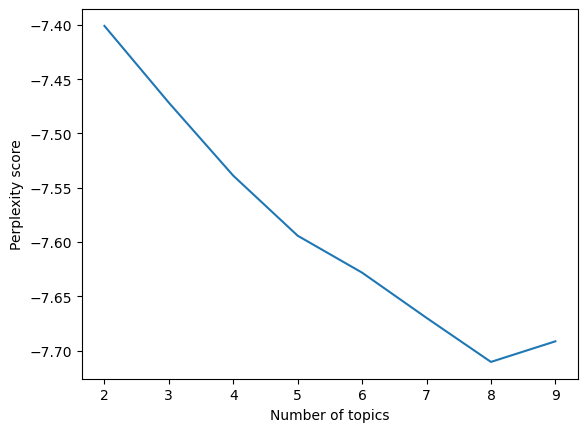

In [103]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [104]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:05<00:00,  8.21s/it]


Text(0, 0.5, 'Coherence score')

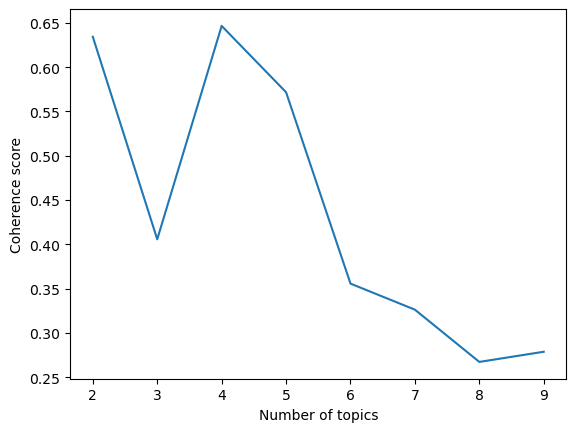

In [105]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [106]:
import numpy as np
from tqdm import tqdm

topic_num = 4
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster0.loc[:, 'action_cluster'] = action_align

df_cluster0


100%|██████████| 593/593 [00:00<00:00, 9497.64it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\2112464866.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.01521943, 0.007458067, 0.01635098, -0.0024...",0,0
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.0073326607, 0.015817216, 0.005940238, 0.00...",0,0
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.015088453, 0.012704681, 0.0048679486, 0.00...",0,1
6,출고 그냥 던져 두었던 사용 설명서를 소설 읽듯 정독 한번 했습니다 궁굼 했던 사용...,"[출고, 그냥, 던지다, 두다, 사용, 소설, 읽다, 정독, 한번, 궁굼, 사용, ...","[-0.012885421, 0.00178408, 0.0007520409, -0.00...",0,2
8,안녕하세요 밀키트 판매 하려고 즉판업 영업신고 필요서류에 제조방법 설명서와 식품표시...,"[안녕하다, 키트, 판매, 즉판업, 영업, 신고, 필요, 서류, 제조, 방법, 오다...","[-0.01100888, 0.014917348, 0.013316108, -0.000...",0,3
...,...,...,...,...,...
1181,안녕하세요 혹시 사용설명서 있으면 요청가능할가요 계기판은 우측 필러에 있는 모델입니...,"[안녕하다, 요청, 가능하다, 계기, 우측, 필러, 모델, 부탁드리다]","[-0.0077984226, 0.005452988, 0.005931101, -0.0...",0,2
1182,이번 공구를 통해 전자칠판 윈퀵 어제 날짜라 설치 잘했습니다 그런데 제가 워낙 기계...,"[공구, 통해, 전자칠판, 윈퀵, 어제, 날짜, 설치, 워낙, 기다, 보다, 파일,...","[-0.013936829, 0.011657749, 0.01524799, 0.0055...",0,1
1185,지난번에 제가 컴패스 영문사용설명서를 올린적이 있습니다 오늘 컴패스한글사용설명서 첨...,"[지난번, 패스, 오늘, 패스, 한글, 첨부파일, 패스, 한글, 파일, 다운로드]","[-0.0013476317, 0.011350195, 0.0021364968, 0.0...",0,0
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...,"[찍다, 천사, 가요, 중간, 이사, 가다, 없다, 오븐, 기능, 사용, 싶다, 사...","[0.004233292, 0.0058052926, 0.009724175, 0.001...",0,3


In [107]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster0.html')

In [108]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.013*"사용" + 0.009*"보다" + 0.008*"받다" + 0.008*"나오다" + 0.008*"가다" + 0.007*"모르다" + 0.007*"찾다" + 0.006*"조립" + 0.006*"서다" + 0.006*"확인"
Topic ID: 1, Description: 0.018*"가다" + 0.018*"없다" + 0.013*"확인" + 0.010*"보다" + 0.009*"서다" + 0.006*"아니다" + 0.006*"차량" + 0.006*"상품" + 0.005*"작성" + 0.005*"오다"
Topic ID: 2, Description: 0.022*"거래" + 0.021*"보다" + 0.014*"상품" + 0.014*"서다" + 0.011*"없다" + 0.010*"파일" + 0.010*"정보" + 0.010*"방법" + 0.009*"확인" + 0.009*"받다"
Topic ID: 3, Description: 0.020*"없다" + 0.015*"확인" + 0.011*"가다" + 0.010*"사용" + 0.009*"보다" + 0.007*"서다" + 0.006*"드리다" + 0.006*"작성" + 0.006*"않다" + 0.006*"제품"


In [109]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 4
    elif i == 1:
        n = 3
    elif i == 2:
        n = 1
    else:
        n = 2
    new_action_topic.append(n)
df_cluster0.action_cluster = new_action_topic

100%|██████████| 593/593 [00:00<?, ?it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\1857152167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.action_cluster = new_action_topic


# 클러스터 0 결과

In [110]:
df_cluster0

,Title,tagged_review,vector,cluster,action_cluster
2,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,"[어쩐지, 색깔, 어둡다, 금요일, 다시, 작업, 부분, 아주, 나이, 스샷, 크다...","[-0.01521943, 0.007458067, 0.01635098, -0.0024...",0,4
3,설명서 안보시는 분들을 위해 참고하시라고 올립니다,"[보다, 위해, 참고, 올리다]","[-0.0073326607, 0.015817216, 0.005940238, 0.00...",0,4
4,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,"[오늘, 서다, 대해, 알아보다, 가다, 보다, 차량, 대한, 렌트, 무료, 비교,...","[-0.015088453, 0.012704681, 0.0048679486, 0.00...",0,3
6,출고 그냥 던져 두었던 사용 설명서를 소설 읽듯 정독 한번 했습니다 궁굼 했던 사용...,"[출고, 그냥, 던지다, 두다, 사용, 소설, 읽다, 정독, 한번, 궁굼, 사용, ...","[-0.012885421, 0.00178408, 0.0007520409, -0.00...",0,1
8,안녕하세요 밀키트 판매 하려고 즉판업 영업신고 필요서류에 제조방법 설명서와 식품표시...,"[안녕하다, 키트, 판매, 즉판업, 영업, 신고, 필요, 서류, 제조, 방법, 오다...","[-0.01100888, 0.014917348, 0.013316108, -0.000...",0,2
...,...,...,...,...,...
1181,안녕하세요 혹시 사용설명서 있으면 요청가능할가요 계기판은 우측 필러에 있는 모델입니...,"[안녕하다, 요청, 가능하다, 계기, 우측, 필러, 모델, 부탁드리다]","[-0.0077984226, 0.005452988, 0.005931101, -0.0...",0,1
1182,이번 공구를 통해 전자칠판 윈퀵 어제 날짜라 설치 잘했습니다 그런데 제가 워낙 기계...,"[공구, 통해, 전자칠판, 윈퀵, 어제, 날짜, 설치, 워낙, 기다, 보다, 파일,...","[-0.013936829, 0.011657749, 0.01524799, 0.0055...",0,3
1185,지난번에 제가 컴패스 영문사용설명서를 올린적이 있습니다 오늘 컴패스한글사용설명서 첨...,"[지난번, 패스, 오늘, 패스, 한글, 첨부파일, 패스, 한글, 파일, 다운로드]","[-0.0013476317, 0.011350195, 0.0021364968, 0.0...",0,4
1190,설명서 전부 찍어주실 천사 있으신가요 중간에 이사 거라 설명서가 없네요 오븐 기능도...,"[찍다, 천사, 가요, 중간, 이사, 가다, 없다, 오븐, 기능, 사용, 싶다, 사...","[0.004233292, 0.0058052926, 0.009724175, 0.001...",0,2


# 클러스터 1

In [111]:
df_cluster1 = df[df["cluster"] == 1]
display(df_cluster1)
display(df_cluster1.shape)

,Title,tagged_review,vector,cluster
5,확인설명서 번에 관리비는 아파트는 세대당 사용하는 관리비가 있지만 주택의 경우에는 ...,"[확인, 관리, 비다, 아파트, 세대, 사용, 관리, 주택, 경우, 건물, 청소, ...","[-0.01433695, 0.019929755, 0.011719375, 0.0093...",1
7,종이 설명서 제작이 완료되었습니다 기존 인터넷 홈페이지나 유저그룹 카페 내부 게시글...,"[종이, 제작, 완료, 되어다, 기존, 인터넷, 홈페이지, 유저, 그룹, 카페, 내...","[-0.0061423266, 0.036731318, 0.009287771, 0.00...",1
23,소속공인중개사로 현장안내 했다면 중개대상물 확인설명서 현장안내 부분에 소속공인중개사...,"[공인, 중개사, 현장, 안내, 중개, 대상, 확인, 현장, 안내, 부분, 소속, ...","[-0.00076005317, 0.018399801, 0.01188851, 0.00...",1
25,안녕하세요 스티커라벨부터 설명서인쇄까지 제작하고 있는 무궁화엘엔비입니다 오늘은 붙이...,"[안녕하다, 스티커, 라벨, 인쇄, 제작, 무궁화, 엔비, 오늘, 붙이다, 매뉴얼,...","[-0.018935483, 0.024196353, 0.01690447, 0.0030...",1
39,모든 확인설명서에 표시되야 하는 공통사항입니다 물권 거세실수 대상물건의 표시 권리관...,"[모든, 확인, 서다, 표시, 공통, 사항, 물권, 거세, 실수, 대상, 물건, 표...","[-0.013818727, 0.05407572, 0.029618531, -0.002...",1
...,...,...,...,...
1168,충전기설명서충전기상자 가격 거래방법 직거래 택배거래 거래 희망 지역 금정동 판매자정...,"[충전기, 충전기, 상자, 가격, 거래, 방법, 직거래, 택배, 거래, 거래, 희망...","[-0.0051262197, 0.017837908, 0.01944076, 0.010...",1
1169,디스커버리 출고 받으면 종이로 차량 설명서 책자 별도로 주나요 어플에서 가이드 있는...,"[디스커버리, 출고, 받다, 종이, 차량, 책자, 별도, 주다, 어플, 가이드, 주...","[-0.00982709, 0.02334861, 0.017183471, 0.00108...",1
1174,탈중앙 금융 디파이를 알아보기 위해 디파이 사용설명서를 선택한다 디파이 사용설명서 ...,"[중앙, 금융, 디파이, 알아보다, 위해, 디파이, 선택, 디파이, 테이블, 코인,...","[-0.005587301, 0.029438395, 0.016411366, 0.013...",1
1175,년도 자산취득비 예산요구설명서 작성에 내년도에 헬스장에 노후기구를 바꾸려고 헬스장에...,"[년도, 자산, 취득, 예산, 작성, 년도, 헬스장, 노후, 기구, 바꾸다, 헬스장...","[-0.0061702556, 0.029292986, 0.016882762, -0.0...",1


(217, 4)

In [112]:
all_docs = list(df_cluster1["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

1390

In [113]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

217

In [114]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

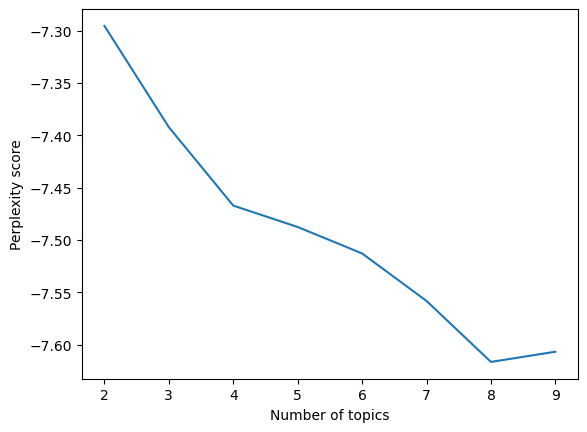

In [115]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [116]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:19<00:00,  2.43s/it]


Text(0, 0.5, 'Coherence score')

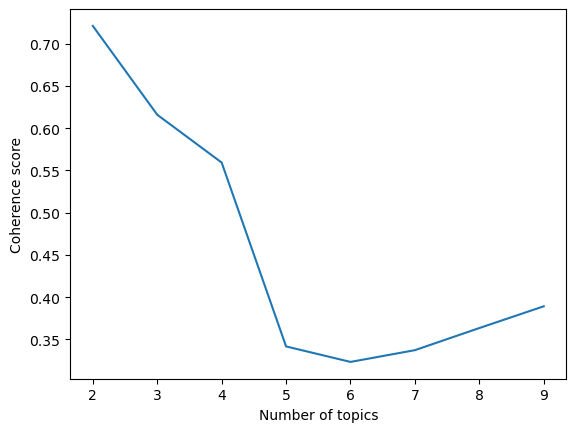

In [117]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [118]:
topic_num = 4
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster1.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster1.html')

100%|██████████| 217/217 [00:00<00:00, 11093.47it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\3303931866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.loc[:, 'action_cluster'] = action_align


In [119]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.014*"확인" + 0.008*"읽다" + 0.007*"보다" + 0.007*"없다" + 0.006*"두다" + 0.006*"자동차" + 0.005*"해보다" + 0.005*"차량" + 0.005*"한글" + 0.005*"문학"
Topic ID: 1, Description: 0.013*"서다" + 0.011*"확인" + 0.010*"보다" + 0.009*"사용" + 0.008*"없다" + 0.008*"첨부파일" + 0.007*"다운로드" + 0.007*"파일" + 0.006*"작성" + 0.006*"경우"
Topic ID: 2, Description: 0.008*"없다" + 0.007*"확인" + 0.007*"거래" + 0.007*"보다" + 0.006*"적다" + 0.006*"만들다" + 0.006*"서다" + 0.005*"취급" + 0.005*"사항" + 0.005*"제품"
Topic ID: 3, Description: 0.015*"확인" + 0.009*"없다" + 0.007*"구매" + 0.007*"차량" + 0.006*"계약" + 0.006*"보다" + 0.005*"모닝" + 0.005*"제품" + 0.005*"취급" + 0.005*"건축물"


In [120]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster1.action_cluster):
    if i == 0:
        n = 2
    elif i == 1:
        n = 1
    elif i == 2:
        n = 4
    else:
        n = 3
    new_action_topic.append(n)
df_cluster1.action_cluster = new_action_topic

100%|██████████| 217/217 [00:00<?, ?it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\3478529590.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.action_cluster = new_action_topic


# 클러스터 1 결과

In [122]:
df_cluster1

,Title,tagged_review,vector,cluster,action_cluster
5,확인설명서 번에 관리비는 아파트는 세대당 사용하는 관리비가 있지만 주택의 경우에는 ...,"[확인, 관리, 비다, 아파트, 세대, 사용, 관리, 주택, 경우, 건물, 청소, ...","[-0.01433695, 0.019929755, 0.011719375, 0.0093...",1,1
7,종이 설명서 제작이 완료되었습니다 기존 인터넷 홈페이지나 유저그룹 카페 내부 게시글...,"[종이, 제작, 완료, 되어다, 기존, 인터넷, 홈페이지, 유저, 그룹, 카페, 내...","[-0.0061423266, 0.036731318, 0.009287771, 0.00...",1,3
23,소속공인중개사로 현장안내 했다면 중개대상물 확인설명서 현장안내 부분에 소속공인중개사...,"[공인, 중개사, 현장, 안내, 중개, 대상, 확인, 현장, 안내, 부분, 소속, ...","[-0.00076005317, 0.018399801, 0.01188851, 0.00...",1,1
25,안녕하세요 스티커라벨부터 설명서인쇄까지 제작하고 있는 무궁화엘엔비입니다 오늘은 붙이...,"[안녕하다, 스티커, 라벨, 인쇄, 제작, 무궁화, 엔비, 오늘, 붙이다, 매뉴얼,...","[-0.018935483, 0.024196353, 0.01690447, 0.0030...",1,4
39,모든 확인설명서에 표시되야 하는 공통사항입니다 물권 거세실수 대상물건의 표시 권리관...,"[모든, 확인, 서다, 표시, 공통, 사항, 물권, 거세, 실수, 대상, 물건, 표...","[-0.013818727, 0.05407572, 0.029618531, -0.002...",1,1
...,...,...,...,...,...
1168,충전기설명서충전기상자 가격 거래방법 직거래 택배거래 거래 희망 지역 금정동 판매자정...,"[충전기, 충전기, 상자, 가격, 거래, 방법, 직거래, 택배, 거래, 거래, 희망...","[-0.0051262197, 0.017837908, 0.01944076, 0.010...",1,4
1169,디스커버리 출고 받으면 종이로 차량 설명서 책자 별도로 주나요 어플에서 가이드 있는...,"[디스커버리, 출고, 받다, 종이, 차량, 책자, 별도, 주다, 어플, 가이드, 주...","[-0.00982709, 0.02334861, 0.017183471, 0.00108...",1,2
1174,탈중앙 금융 디파이를 알아보기 위해 디파이 사용설명서를 선택한다 디파이 사용설명서 ...,"[중앙, 금융, 디파이, 알아보다, 위해, 디파이, 선택, 디파이, 테이블, 코인,...","[-0.005587301, 0.029438395, 0.016411366, 0.013...",1,2
1175,년도 자산취득비 예산요구설명서 작성에 내년도에 헬스장에 노후기구를 바꾸려고 헬스장에...,"[년도, 자산, 취득, 예산, 작성, 년도, 헬스장, 노후, 기구, 바꾸다, 헬스장...","[-0.0061702556, 0.029292986, 0.016882762, -0.0...",1,1


# 클러스터 2

In [123]:
df_cluster2 = df[df["cluster"] == 2]
display(df_cluster2)
display(df_cluster2.shape)

,Title,tagged_review,vector,cluster
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...,"[명절, 아빠, 따르다, 대형, 마트, 서다, 사오다, 띠옹, 조립, 가다, 어딨다...","[-0.0058990023, -0.0049322173, -0.009394715, 0...",2
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...,"[릴오, 사진, 찍다, 보관, 오늘, 보다, 한글, 사용, 공부, 공부, 가보다]","[-0.008247137, 0.002820374, -0.0031695392, 0.0...",2
9,소공은 확인설명서 작성의무가 없다고 하는데 그럼 소공은 확인설명서를 작성할 있다 맞...,"[소공, 확인, 의무, 없다, 그렇다, 소공, 확인, 작성, 맞다, 지문]","[0.0014404533, 0.0052361367, -0.0056523797, -0...",2
13,구입했는데 사용 설명서가 없네요 예전에는 설명서 책자가 있었는데 리뉴얼 되면서 안주...,"[구입, 사용, 가다, 없다, 예전, 책자, 리뉴얼, 안주, 보다, 다운로드, 받다...","[-0.0011150029, 0.0019947968, -0.0019353745, -...",2
17,독일유머 재미없다고 들었는데 독일어와 영어 설명서는 재료 먹는 방법을 자세히 설명해...,"[독일, 유머, 재미없다, 들다, 독일어, 영어, 서다, 재료, 먹다, 방법, 자세...","[-0.0035399178, 0.013236059, 0.0019847725, -0....",2
...,...,...,...,...
1183,생겼는데 설명서조립방법가 없어요 꼬맹이가 차를 좋아해서 계속 만들어 달라고 들고오는...,"[생기다, 조립, 방법, 없다, 꼬맹이, 좋아하다, 계속, 만들다, 달라, 들다, ...","[-0.0012068718, 0.0051341434, -0.0027824468, 0...",2
1184,수영 강습비라도 벌어볼까 싶은 생각에 읽어봤지만 역시나 책을 읽은 지금은 실천하기 ...,"[수영, 강습, 벌다, 보다, 싶다, 생각, 읽다, 보다, 역시, 읽다, 지금, 실...","[0.002816863, -0.013143657, -0.008243972, 0.00...",2
1186,게임 방법 설명은 사용 설명서에도 없고 찍어서 안내 게시판 찾아봐도 안나오더라구요 ...,"[게임, 방법, 사용, 서다, 없다, 찍다, 안내, 게시판, 찾아보다, 나오다, 구...","[0.009243053, -0.010399689, 0.0062475307, -0.0...",2
1188,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...,"[댓글, 파일, 안되다, 올리다, 전원, 아니다, 녹화, 설정, 나오다, 자세하다,...","[-0.0052484972, -0.0018523826, -0.0033505852, ...",2


(382, 4)

In [124]:
all_docs = list(df_cluster2["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

1610

In [125]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

382

In [126]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

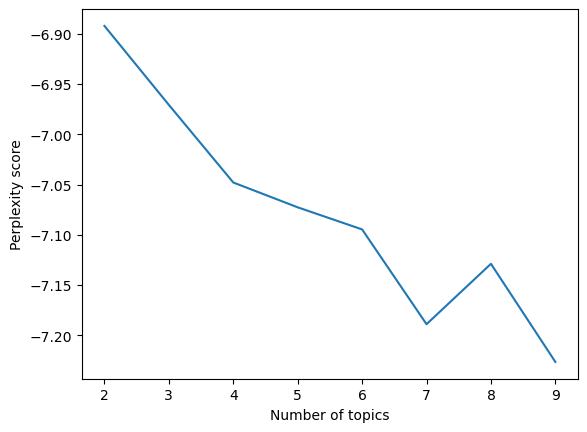

In [127]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [128]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:19<00:00,  2.45s/it]


Text(0, 0.5, 'Coherence score')

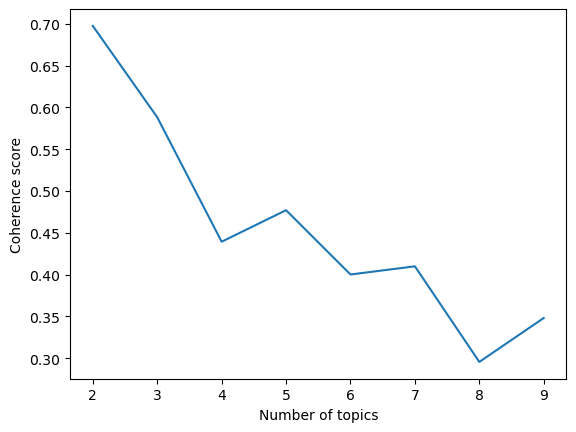

In [129]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [130]:
topic_num = 4
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster2.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster2.html')

100%|██████████| 382/382 [00:00<00:00, 10824.45it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\2237816934.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.loc[:, 'action_cluster'] = action_align


In [131]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.028*"가다" + 0.027*"없다" + 0.021*"확인" + 0.021*"파일" + 0.018*"다운로드" + 0.016*"첨부파일" + 0.014*"차량" + 0.010*"서다" + 0.009*"사용" + 0.009*"취급"
Topic ID: 1, Description: 0.025*"거래" + 0.025*"보다" + 0.020*"상품" + 0.019*"없다" + 0.018*"구매" + 0.016*"방법" + 0.014*"정보" + 0.014*"받다" + 0.010*"서다" + 0.010*"가다"
Topic ID: 2, Description: 0.028*"없다" + 0.025*"보다" + 0.018*"서다" + 0.015*"받다" + 0.012*"가다" + 0.012*"확인" + 0.009*"만들다" + 0.009*"제품" + 0.008*"좋다" + 0.008*"작성"
Topic ID: 3, Description: 0.022*"없다" + 0.020*"신분" + 0.016*"조립" + 0.013*"가다" + 0.012*"받다" + 0.012*"서다" + 0.011*"보다" + 0.011*"되어다" + 0.011*"제품" + 0.010*"아니다"


In [132]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster2.action_cluster):
    if i == 0:
        n = 1
    elif i == 1:
        n = 2
    elif i == 2:
        n = 4
    else:
        n = 3
    new_action_topic.append(n)
df_cluster2.action_cluster = new_action_topic

100%|██████████| 382/382 [00:00<00:00, 361349.60it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19880\1882694521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.action_cluster = new_action_topic


In [133]:
df_cluster2

,Title,tagged_review,vector,cluster,action_cluster
0,명절에 아이가 아빠따라 대형마트에가서 사왔는데 띠옹 조립설명서가 어딨나요 조립이라 ...,"[명절, 아빠, 따르다, 대형, 마트, 서다, 사오다, 띠옹, 조립, 가다, 어딨다...","[-0.0058990023, -0.0049322173, -0.009394715, 0...",2,3
1,릴오고 사진만 찍고 보관하다가 오늘 설명서보니 한글사용 설명서 구할때 있을까요 이래...,"[릴오, 사진, 찍다, 보관, 오늘, 보다, 한글, 사용, 공부, 공부, 가보다]","[-0.008247137, 0.002820374, -0.0031695392, 0.0...",2,4
9,소공은 확인설명서 작성의무가 없다고 하는데 그럼 소공은 확인설명서를 작성할 있다 맞...,"[소공, 확인, 의무, 없다, 그렇다, 소공, 확인, 작성, 맞다, 지문]","[0.0014404533, 0.0052361367, -0.0056523797, -0...",2,3
13,구입했는데 사용 설명서가 없네요 예전에는 설명서 책자가 있었는데 리뉴얼 되면서 안주...,"[구입, 사용, 가다, 없다, 예전, 책자, 리뉴얼, 안주, 보다, 다운로드, 받다...","[-0.0011150029, 0.0019947968, -0.0019353745, -...",2,1
17,독일유머 재미없다고 들었는데 독일어와 영어 설명서는 재료 먹는 방법을 자세히 설명해...,"[독일, 유머, 재미없다, 들다, 독일어, 영어, 서다, 재료, 먹다, 방법, 자세...","[-0.0035399178, 0.013236059, 0.0019847725, -0....",2,3
...,...,...,...,...,...
1183,생겼는데 설명서조립방법가 없어요 꼬맹이가 차를 좋아해서 계속 만들어 달라고 들고오는...,"[생기다, 조립, 방법, 없다, 꼬맹이, 좋아하다, 계속, 만들다, 달라, 들다, ...","[-0.0012068718, 0.0051341434, -0.0027824468, 0...",2,3
1184,수영 강습비라도 벌어볼까 싶은 생각에 읽어봤지만 역시나 책을 읽은 지금은 실천하기 ...,"[수영, 강습, 벌다, 보다, 싶다, 생각, 읽다, 보다, 역시, 읽다, 지금, 실...","[0.002816863, -0.013143657, -0.008243972, 0.00...",2,2
1186,게임 방법 설명은 사용 설명서에도 없고 찍어서 안내 게시판 찾아봐도 안나오더라구요 ...,"[게임, 방법, 사용, 서다, 없다, 찍다, 안내, 게시판, 찾아보다, 나오다, 구...","[0.009243053, -0.010399689, 0.0062475307, -0.0...",2,4
1188,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...,"[댓글, 파일, 안되다, 올리다, 전원, 아니다, 녹화, 설정, 나오다, 자세하다,...","[-0.0052484972, -0.0018523826, -0.0033505852, ...",2,3


In [135]:
df_cluster0 = df_cluster0[['Title', 'cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'cluster', 'action_cluster']]
df_cluster2 = df_cluster2[['Title', 'cluster', 'action_cluster']]
df_combined = pd.concat([df_cluster0, df_cluster1, df_cluster2], ignore_index=True)
df_combined

,Title,cluster,action_cluster
0,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이...,0,4
1,설명서 안보시는 분들을 위해 참고하시라고 올립니다,0,4
2,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트...,0,3
3,출고 그냥 던져 두었던 사용 설명서를 소설 읽듯 정독 한번 했습니다 궁굼 했던 사용...,0,1
4,안녕하세요 밀키트 판매 하려고 즉판업 영업신고 필요서류에 제조방법 설명서와 식품표시...,0,2
...,...,...,...
1187,생겼는데 설명서조립방법가 없어요 꼬맹이가 차를 좋아해서 계속 만들어 달라고 들고오는...,2,3
1188,수영 강습비라도 벌어볼까 싶은 생각에 읽어봤지만 역시나 책을 읽은 지금은 실천하기 ...,2,2
1189,게임 방법 설명은 사용 설명서에도 없고 찍어서 안내 게시판 찾아봐도 안나오더라구요 ...,2,4
1190,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가...,2,3


In [144]:
import json
with open('설명서/data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    senti_dict = json.load(f)
senti_dict

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

In [145]:
def sentiment_score(sent_dicts, token_list):
    result_list=[]
    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    return result_list 

In [146]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective','Verb', 'VerbPrefix']:
            tagged_list.append(word)
    return tagged_list

In [147]:
sentiment=[]
for i in tqdm(df_combined['Title']):
    token = okt_pos_tagging(i)
    score = sentiment_score(senti_dict, token)
    sentiment.append(score)
sentiment

100%|██████████| 1192/1192 [00:18<00:00, 62.92it/s]


[[('-1', '어둡다'), ('1', '크다'), ('1', '크다')],
 [],
 [('1', '필수')],
 [('2', '좋다')],
 [('-2', '해')],
 [('1', '받다'), ('0', '원하다')],
 [('1', '받다')],
 [('-1', '없다'), ('2', '많다'), ('-2', '아니다')],
 [('-2', '아니다'), ('-1', '없다'), ('1', '받다')],
 [('-2', '좌절')],
 [('1', '도움')],
 [],
 [('-1', '없다'), ('-1', '없다'), ('1', '도와주다')],
 [],
 [('1', '받다'), ('2', '고맙다')],
 [('-1', '없다')],
 [],
 [('1', '대상'), ('1', '대상')],
 [('-1', '없다')],
 [('2', '좋다')],
 [('-1', '없다'), ('-2', '버리다'), ('-2', '아니다')],
 [],
 [('-1', '없다'), ('-1', '아쉽다'), ('-1', '없다')],
 [('-2', '아니다'), ('-1', '없어지다'), ('-2', '어렵다'), ('2', '감사하다')],
 [('1', '제대로')],
 [],
 [],
 [],
 [('-2', '불편하다'), ('2', '가능하다')],
 [],
 [('-2', '아니다')],
 [],
 [('-1', '없다'), ('1', '받다'), ('0', '못'), ('-1', '없다')],
 [('-1', '없다'), ('-1', '아쉽다'), ('1', '크다')],
 [('-1', '없다')],
 [('2', '가능하다')],
 [],
 [('-1', '없다'), ('2', '많다')],
 [('1', '이기다')],
 [],
 [],
 [],
 [('1', '꼼꼼하다')],
 [('1', '친구')],
 [('-2', '버리다')],
 [],
 [('-1', '없다'), ('-1', '없다'), ('-2', '아니다')],
 [

In [148]:
#감성점수 평균구하기
sentiment_score = []
for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))

    #감성 점수가 잡히지 않은 리스트는 len이 0
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))
sentiment_score

100%|██████████| 1192/1192 [00:00<00:00, 183660.66it/s]


[0.3333333333333333,
 0,
 1.0,
 2.0,
 -2.0,
 0.5,
 1.0,
 -0.3333333333333333,
 -0.6666666666666666,
 -2.0,
 1.0,
 0,
 -0.3333333333333333,
 0,
 1.5,
 -1.0,
 0,
 1.0,
 -1.0,
 2.0,
 -1.6666666666666667,
 0,
 -1.0,
 -0.75,
 1.0,
 0,
 0,
 0,
 0.0,
 0,
 -2.0,
 0,
 -0.25,
 -0.3333333333333333,
 -1.0,
 2.0,
 0,
 0.5,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 -2.0,
 0,
 -1.3333333333333333,
 0,
 0,
 2.0,
 1.5,
 0.0,
 0.5,
 0,
 0,
 -1.0,
 -2.0,
 0,
 -1.5,
 0.0,
 -2.0,
 0.5,
 2.0,
 2.0,
 0,
 1.0,
 1.0,
 -1.0,
 -1.25,
 0.0,
 0.5,
 -1.0,
 -0.3333333333333333,
 -1.0,
 0,
 -1.0,
 0,
 -2.0,
 0,
 -1.0,
 2.0,
 2.0,
 0,
 -1.3333333333333333,
 0,
 -1.0,
 0.0,
 -1.0,
 0,
 -1.0,
 1.0,
 -1.0,
 -2.0,
 -1.0,
 -1.0,
 0.5,
 -0.5,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -0.5,
 1.5,
 -0.25,
 -2.0,
 1.0,
 -1.0,
 0,
 -2.0,
 0,
 1.0,
 1.0,
 -2.0,
 -0.3333333333333333,
 -2.0,
 2.0,
 0,
 0,
 0.6666666666666666,
 1.0,
 1.0,
 -1.0,
 0,
 -2.0,
 1.0,
 2.0,
 0,
 0,
 0,
 2.0,
 1.0,
 2.0,
 1.0,
 0,
 -0.3333333333333333,
 -0.6666666666666666,
 -1.66

In [151]:
df_combined['sentiment_score'] = sentiment_score
df_combined.action_cluster.unique()

array([4, 3, 1, 2], dtype=int64)

In [153]:
action_sents=dict()
for actor in df_combined.cluster.unique():
    actor_df = df_combined[df_combined['cluster']==actor]

    for i in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster']==i].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score
action_sents

{'Actor0_Action4': 0.1184873949579832,
 'Actor0_Action3': -0.18997668997668998,
 'Actor0_Action1': 0.09096491228070176,
 'Actor0_Action2': -0.17781155015197567,
 'Actor1_Action1': 0.015151515151515166,
 'Actor1_Action3': 0.11949685534591195,
 'Actor1_Action4': -0.10087719298245613,
 'Actor1_Action2': -0.2819444444444444,
 'Actor2_Action3': -0.24014336917562726,
 'Actor2_Action4': -0.10755555555555556,
 'Actor2_Action1': -0.15266666666666664,
 'Actor2_Action2': 0.16835205992509364}

In [154]:
from sklearn.preprocessing import MinMaxScaler

data = action_sents.values()

data = np.array(list(data)).reshape(-1,1)
data

array([[ 0.11848739],
       [-0.18997669],
       [ 0.09096491],
       [-0.17781155],
       [ 0.01515152],
       [ 0.11949686],
       [-0.10087719],
       [-0.28194444],
       [-0.24014337],
       [-0.10755556],
       [-0.15266667],
       [ 0.16835206]])

In [155]:
scaler = MinMaxScaler(feature_range=(-10, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[  7.78525196],
       [ -5.91523569],
       [  6.56283596],
       [ -5.37491882],
       [  3.19557033],
       [  7.83008733],
       [ -1.95786555],
       [-10.        ],
       [ -8.14339775],
       [ -2.25448622],
       [ -4.25810431],
       [ 10.        ]])

In [156]:
sents_df = pd.DataFrame(action_sents.keys(), columns=['Action'])
sents_df['satisfaction'] = transformed_data
sents_df

,Action,satisfaction
0,Actor0_Action4,7.785252
1,Actor0_Action3,-5.915236
2,Actor0_Action1,6.562836
3,Actor0_Action2,-5.374919
4,Actor1_Action1,3.195570
5,Actor1_Action3,7.830087
6,Actor1_Action4,-1.957866
7,Actor1_Action2,-10.000000
8,Actor2_Action3,-8.143398
9,Actor2_Action4,-2.254486


In [157]:
from collections import Counter
importance_check = []
for actor, action in zip(df_combined['cluster'], df_combined['action_cluster']):
    importance_check.append('Actor'+str(actor)+ '_'+'Action'+str(action))
importance_check

['Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Act

In [158]:
freq = Counter(importance_check)
freq

Counter({'Actor0_Action1': 190,
         'Actor0_Action3': 143,
         'Actor0_Action2': 141,
         'Actor2_Action1': 125,
         'Actor0_Action4': 119,
         'Actor2_Action3': 93,
         'Actor2_Action2': 89,
         'Actor2_Action4': 75,
         'Actor1_Action1': 66,
         'Actor1_Action2': 60,
         'Actor1_Action3': 53,
         'Actor1_Action4': 38})

In [159]:
importance_dict = dict()

total_count = len(importance_check)
for item, value in freq.items():
    importance = (value/total_count)*100
    importance_dict[item] = importance
importance_dict

{'Actor0_Action4': 9.983221476510067,
 'Actor0_Action3': 11.996644295302012,
 'Actor0_Action1': 15.939597315436242,
 'Actor0_Action2': 11.828859060402683,
 'Actor1_Action1': 5.5369127516778525,
 'Actor1_Action3': 4.446308724832215,
 'Actor1_Action4': 3.1879194630872485,
 'Actor1_Action2': 5.033557046979865,
 'Actor2_Action3': 7.802013422818792,
 'Actor2_Action4': 6.291946308724833,
 'Actor2_Action1': 10.486577181208053,
 'Actor2_Action2': 7.466442953020135}

In [160]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1,1)
data

array([[ 9.98322148],
       [11.9966443 ],
       [15.93959732],
       [11.82885906],
       [ 5.53691275],
       [ 4.44630872],
       [ 3.18791946],
       [ 5.03355705],
       [ 7.80201342],
       [ 6.29194631],
       [10.48657718],
       [ 7.46644295]])

In [161]:
scaler = MinMaxScaler(feature_range=(0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 5.32894737],
       [ 6.90789474],
       [10.        ],
       [ 6.77631579],
       [ 1.84210526],
       [ 0.98684211],
       [ 0.        ],
       [ 1.44736842],
       [ 3.61842105],
       [ 2.43421053],
       [ 5.72368421],
       [ 3.35526316]])

In [162]:
sents_df['importance'] = transformed_data
sents_df

,Action,satisfaction,importance
0,Actor0_Action4,7.785252,5.328947
1,Actor0_Action3,-5.915236,6.907895
2,Actor0_Action1,6.562836,10.000000
3,Actor0_Action2,-5.374919,6.776316
4,Actor1_Action1,3.195570,1.842105
5,Actor1_Action3,7.830087,0.986842
6,Actor1_Action4,-1.957866,0.000000
7,Actor1_Action2,-10.000000,1.447368
8,Actor2_Action3,-8.143398,3.618421
9,Actor2_Action4,-2.254486,2.434211


In [163]:
def Opportunity_score(satisfaction, importance):
    return importance+max(0,satisfaction-importance)

In [165]:
opportunity_list = []
for s, i in zip(sents_df['satisfaction'], sents_df['importance']):
    score_result = Opportunity_score(s, i)
    opportunity_list.append(score_result)
sents_df['opportunity'] = opportunity_list
sents_df.to_csv('data/opportunity_score_df.csv',index=False)
sents_df

,Action,satisfaction,importance,opportunity
0,Actor0_Action4,7.785252,5.328947,7.785252
1,Actor0_Action3,-5.915236,6.907895,6.907895
2,Actor0_Action1,6.562836,10.000000,10.000000
3,Actor0_Action2,-5.374919,6.776316,6.776316
4,Actor1_Action1,3.195570,1.842105,3.195570
5,Actor1_Action3,7.830087,0.986842,7.830087
6,Actor1_Action4,-1.957866,0.000000,0.000000
7,Actor1_Action2,-10.000000,1.447368,1.447368
8,Actor2_Action3,-8.143398,3.618421,3.618421
9,Actor2_Action4,-2.254486,2.434211,2.434211


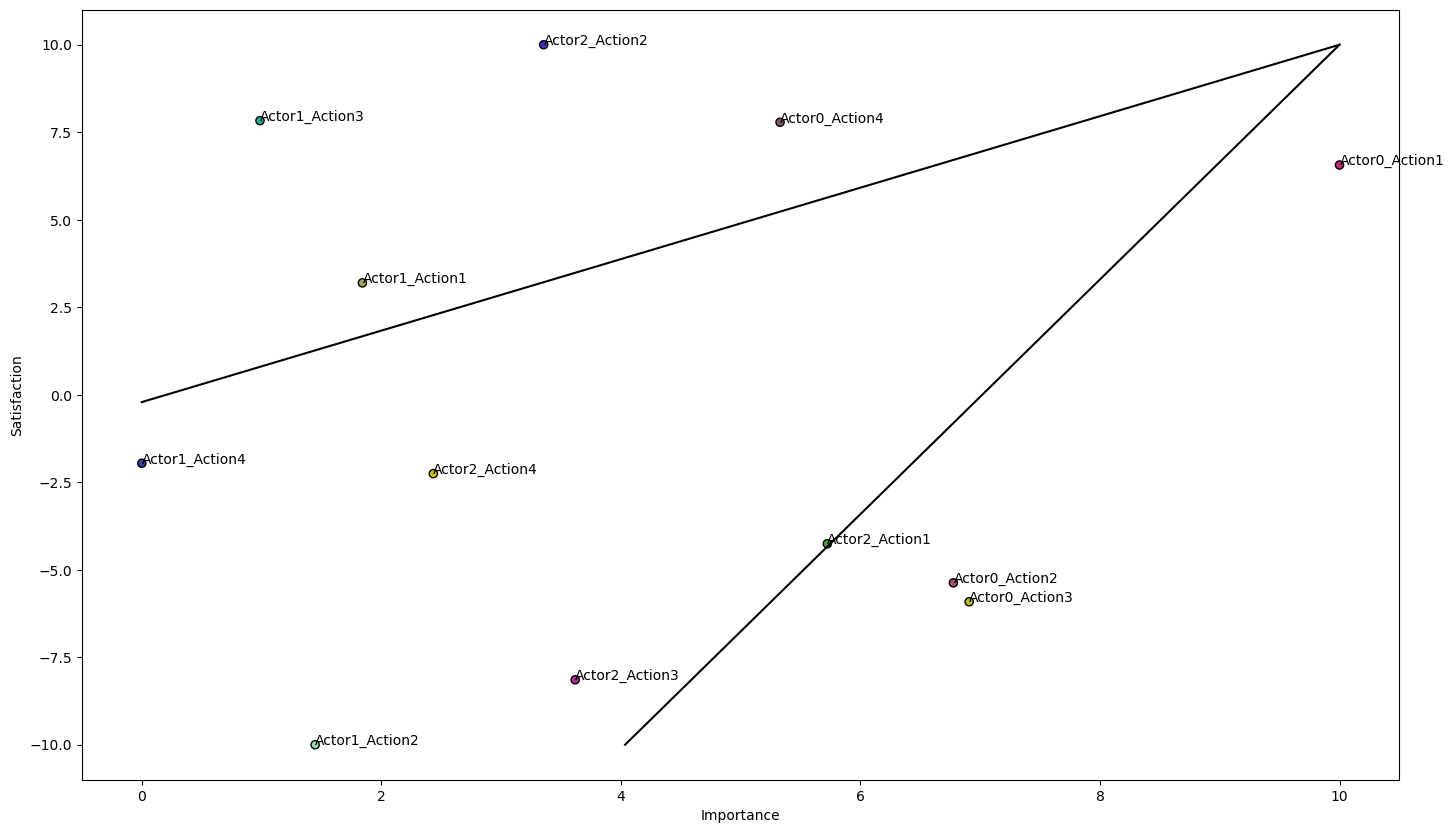

In [167]:
colors = np.random.rand(len(sents_df.Action), 3)
satisfaction = sents_df.satisfaction
importance = sents_df.importance
actions = sents_df.Action
plt.figure(figsize=(17, 10))
plt.scatter(importance, satisfaction,  s=35, c=colors, edgecolors='black') #s는 점의 사이

xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, 'k')

for i, action in enumerate(actions):
    plt.text(importance[i], satisfaction[i], action, fontsize=10)
    
plt.savefig('data/opportunity_area.png')

In [169]:
df_combined

,Title,cluster,action_cluster,sentiment_score
0,어쩐지 외장을 색깔이 어둡다 했습니다 금요일 부터 다시 작업해야되는 부분 아주 나이스샷 크학 설명서 읽어 보고 해야됩니다 크학 그럼 이십만,0,4,0.333333
1,설명서 안보시는 분들을 위해 참고하시라고 올립니다,0,4,0.000000
2,오늘은 설명서에 대해 알아보는 시간을 가져보도록 하겠습니다 차량에 대한 설명서 렌트사 무료 비교 견적 설명서 차량 탐험의 필수 안내서,0,3,1.000000
3,출고 그냥 던져 두었던 사용 설명서를 소설 읽듯 정독 한번 했습니다 궁굼 했던 사용 설명서 읽어보시분들 한번 보세요 좋내요 보다보니 심지어 다이 할수 있도록,0,1,2.000000
4,안녕하세요 밀키트 판매 하려고 즉판업 영업신고 필요서류에 제조방법 설명서와 식품표시사항이 있는데 제가 작성후 종이로 프린트 해가면 되는건가요 제조방법 설명서는,0,2,-2.000000
...,...,...,...,...
1187,생겼는데 설명서조립방법가 없어요 꼬맹이가 차를 좋아해서 계속 만들어 달라고 들고오는데 어찌하는지 일도 모르겠는 영상말고 프린터라도 하고싶은데 설명서를 어디서,2,3,0.500000
1188,수영 강습비라도 벌어볼까 싶은 생각에 읽어봤지만 역시나 책을 읽은 지금은 실천하기 어려운 재테크입니다 이런 식이다보니 재테크 책을 읽은 나지만 수익을 보는,2,2,-0.500000
1189,게임 방법 설명은 사용 설명서에도 없고 찍어서 안내 게시판 찾아봐도 안나오더라구요 혹시나 해서 구매했던 들어가보니 있네요 저처럼 다급한 맘에 찾으신,2,4,-1.000000
1190,댓글로는 파일업이 안되서 올려요 설명서 상에는 상시전원이나 아니라 녹화시간 설정인가 나온거 같은데 자세히 보셔용 스마트폰에서도 볼수 있을겁니다,2,3,-2.000000


In [168]:
df_result = df_combined[(df_combined['action_cluster'] == 2) & (df_combined['cluster'].isin([0, 1, 3]))]
df_result.to_csv('data/result.csv',index=False)